In [14]:
from pymatgen.ext.matproj import MPRester
import numpy

with MPRester("GlyakcTTvuJ54zVW") as m:
    results = m.query("mp-561619", ['cif'])[0]

In [15]:
a=open("local.cif",'w')
b=results.items()
for d,w in b:
    a.write(str(w))
a.close()

In [16]:
from pymatgen.io.cif import CifParser
parser = CifParser("local.cif")
structure = parser.get_structures(True)[0]
#les trois premières cases permettent d'obtenir l'objet structure

 le premier élément de symétrie est :  -y+1/3, -x-1/3, z-1/3 
 les coordonnées de l'atome sur lequel elle est appliquée  :  [0.33, 0.67, 0.67] 
 les coordonnées de l'atome après application de l'élément de symmétrie :  [-0.33666667 -0.66333333  0.33666667]


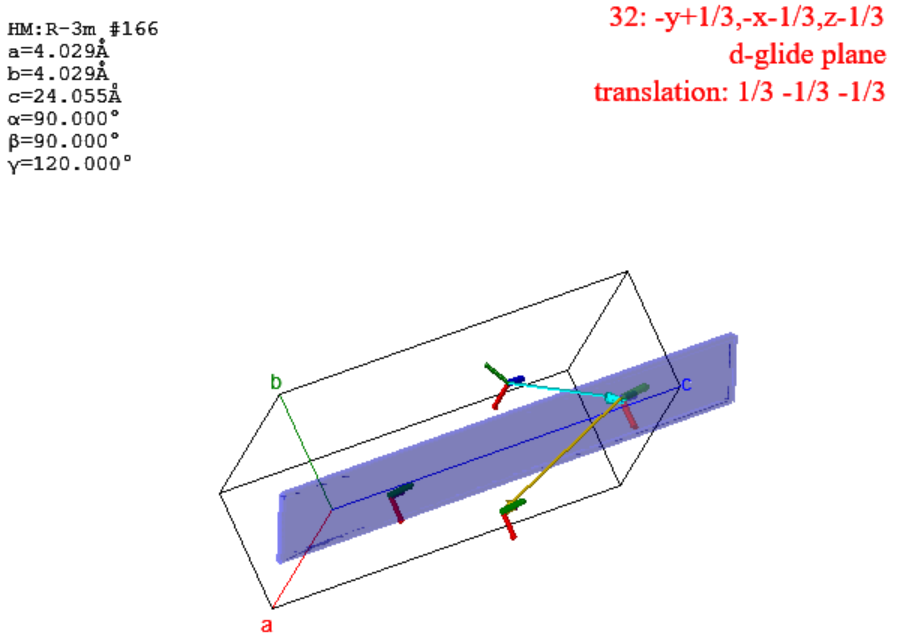

In [17]:
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from IPython.display import Image
from pymatgen.symmetry.structure import SymmetrizedStructure



#La cellule symmetrised est une cellule conventionnelle
n=SpacegroupAnalyzer(structure).get_conventional_standard_structure(international_monoclinic=True)


#Retourne le dataset des symétries sous forme d'un dict
j=SpacegroupAnalyzer(n).get_symmetry_dataset()

#Dans le cas où les vecteurs de translations sortiraient de la cellule conventionnelle on fait -1 pour être conforme avec la représentation donnée sur le site donné dans les consignes
#on transforme ainsi les vecteurs(1/3,2/3,2/3)et (2/3,1/3,1/3) en (1/3,-1/3,-1/3) et (-1/3,1/3,1/3)
for i in range(0,36):
    for k in range(0,3):
        if (j['translations'][i][k]>0.4):
            j['translations'][i][k]=j['translations'][i][k]-1

for i in range(0,36):
    for k in range(0,3):
        if (j['translations'][i][k]<-0.4):
            j['translations'][i][k]=j['translations'][i][k]+1
            
            
#crée un objet SymmOp qui est issu d'une matrice de rotation donnée dans "j" et d'un vecteur de translation
l1=SymmOp.from_rotation_and_translation(j['rotations'][7],j['translations'][30],tol=0.01)#32

#retourne les équations caractérisant l'application
u1=l1.as_xyz_string()

#Effectue la transformation sur l'atome à la position donnée en argument ici :[0.33,0.67,0.67] et retourne sa position après la transformation
p1=l1.operate([0.33,0.67,0.67])#9

#Affiche l'image en png de la transformation via le site linker dans les consignes
print (" le premier élément de symétrie est : ",u1,"\n","les coordonnées de l'atome sur lequel elle est appliquée  : ", [0.33,0.67,0.67],"\n","les coordonnées de l'atome après application de l'élément de symmétrie : ",p1)
Image(filename="img/SYM1-32-9.PNG",width=500,height=500)





 le second élément de symétrie est :  -y-1/3, -x+1/3, z+1/3 
 les coordonnées de l'atome sur lequel elle est appliquée  :  [1.0, 1.0, 1.0] 
 les coordonnées de l'atome après application de l'élément de symmétrie :  [-0.33666667 -0.66333333  0.33666667]


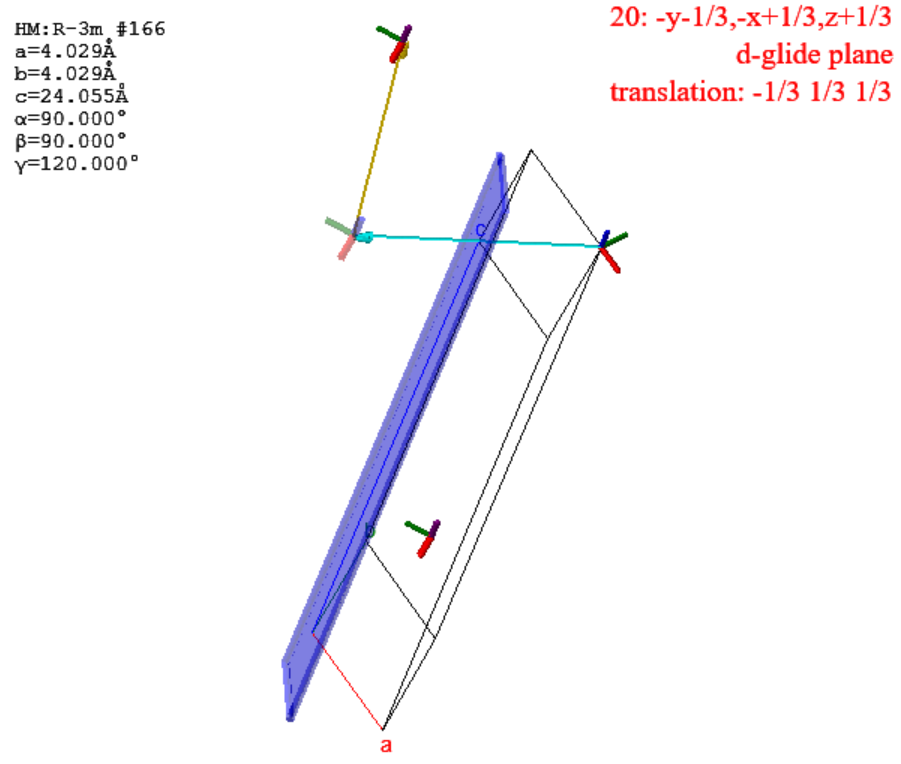

In [18]:
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from IPython.display import Image
from pymatgen.symmetry.structure import SymmetrizedStructure



#La cellule symmetrised est une cellule conventionnelle
n=SpacegroupAnalyzer(structure).get_conventional_standard_structure(international_monoclinic=True)


#Retourne le dataset des symétries sous forme d'un dict
j=SpacegroupAnalyzer(n).get_symmetry_dataset()

#Dans le cas où les vecteurs de translations sortiraient de la cellule conventionnelle on fait -1 pour être conforme avec la représentation donnée sur le site du prof
for i in range(0,36):
    for k in range(0,3):
        if (j['translations'][i][k]>0.4):
            j['translations'][i][k]=j['translations'][i][k]-1

for i in range(0,36):
    for k in range(0,3):
        if (j['translations'][i][k]<-0.4):
            j['translations'][i][k]=j['translations'][i][k]+1
            
            
#crée un objet SymmOp qui est issu d'une matrice de rotation donnée dans "j" et d'un vecteur de translation
l2=SymmOp.from_rotation_and_translation(j['rotations'][7],j['translations'][15],tol=0.01)#23

#retourne les équations caractérisant l'application
u2=l2.as_xyz_string()

#Effectue la transformation sur l'atome a la position donnée en argument ici :[0.00,1.00,0.50] et retourne sa position après la transformation
#Les coordonnées de l'atome sont recopiées depuis l'objet 'structure'
p2=l2.operate([1.00,1.00,1.00])#15

#Affiche l'image en png de la transformation via le site linker dans les consignes
print (" le second élément de symétrie est : ",u2,"\n","les coordonnées de l'atome sur lequel elle est appliquée  : ", [1.00,1.00,1.00],"\n","les coordonnées de l'atome après application de l'élément de symmétrie : ",p1)
Image(filename="img/SYM2.PNG",width=500,height=500)





 le troisième élément de symétrie est :  x-y, x, -z 
 les coordonnées de l'atome sur lequel elle est appliquée  :  [1.0, 0.0, 0.0] 
 les coordonnées de l'atome après application de l'élément de symmétrie :  [1. 1. 0.]


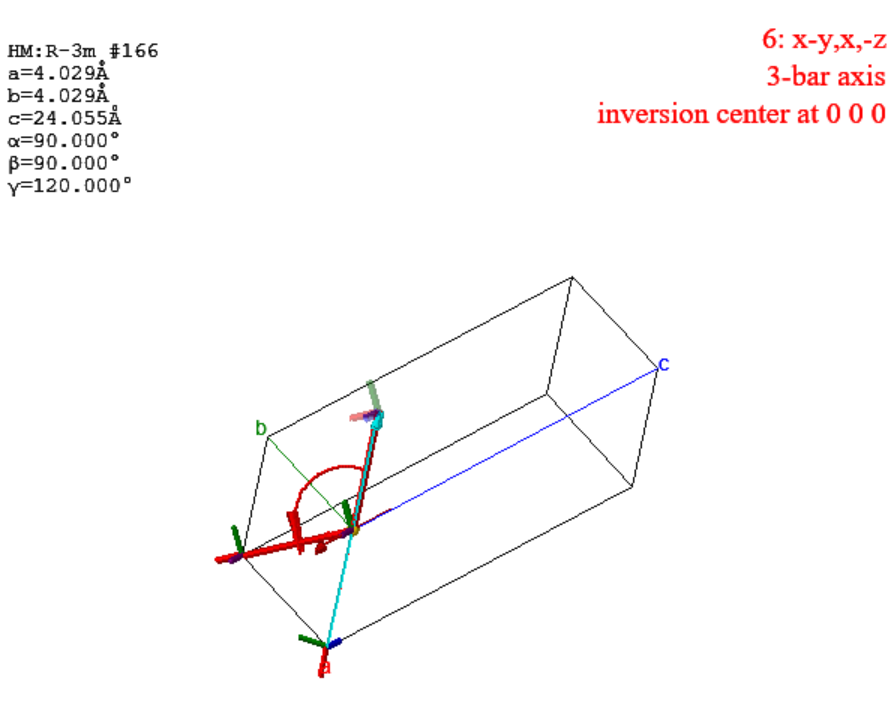

In [19]:
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from IPython.display import Image



#La cellule symmetrised est une cellule conventionnelle
n=SpacegroupAnalyzer(structure).get_conventional_standard_structure(international_monoclinic=True)

#Retourne le dataset des symétries sous forme d'un dict
j=(SpacegroupAnalyzer(n).get_symmetry_dataset())

#crée un objet SymmOp qui est issu d'une matrice de rotation donnée dans "j" et d'un vecteur de translation
l3=SymmOp.from_rotation_and_translation(j['rotations'][5],j['translations'][0],tol=0.01)#32

#retourne les équations caractérisant l'application
u3=l3.as_xyz_string()

#Effectue la transformation sur l'atome à la position donnée en argument ici :[1.00,0.00,0.00] et retourne sa position après la transformation
p3=l3.operate([1.00,0.00,0.00])#9

#Affiche l'image en png de la transformation via le site linker dans les consignes
print (" le troisième élément de symétrie est : ",u3,"\n","les coordonnées de l'atome sur lequel elle est appliquée  : ", [1.00,0.00,0.00],"\n","les coordonnées de l'atome après application de l'élément de symmétrie : ",p3)
Image(filename="img/SYM3-.PNG",width=500,height=500)


